In [3]:
import numpy as np
# import spherical_geometry
import matplotlib.pyplot as plt
# from spherical_geometry.polygon import SphericalPolygon
from scipy import stats
%matplotlib inline

In [4]:
test_3d_path="/home/xiziyi/Japan_slab/Japan_Slab_code/data/ppm/3d_ppm_no_topo/vsv.npy"
data=np.load(test_3d_path)

In [5]:
data.shape

(405, 249, 321)

In [6]:
initial_1d_avg=np.zeros(data.shape[-1])
for i in range(data.shape[-1]):
    initial_1d_avg[i]=np.mean(data[:,:,i][data[:,:,i]!=-1])

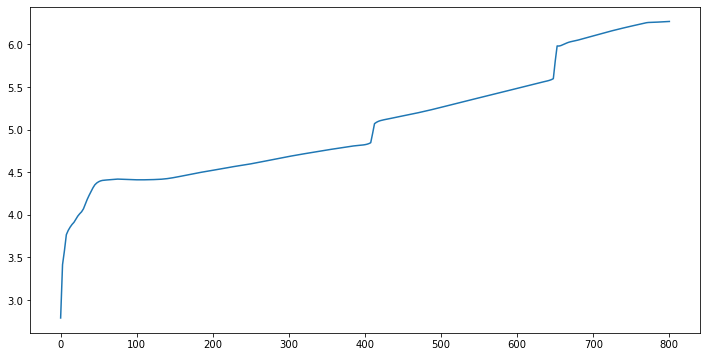

In [7]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg)

## Now we select all the points within tao's simulation region.

In [22]:
boundary_points=[
    [91.3320117152011,9.37366242174489],
    [144.284491292185,2.08633373396527],
    [174.409435753150,48.6744705245903],
    [74.6060844556399,61.1396992149365],
    [91.3320117152011,9.37366242174489]
]

In [23]:
boundary_points=np.array(boundary_points)

In [24]:
boundary_points

array([[ 91.33201172,   9.37366242],
       [144.28449129,   2.08633373],
       [174.40943575,  48.67447052],
       [ 74.60608446,  61.13969921],
       [ 91.33201172,   9.37366242]])

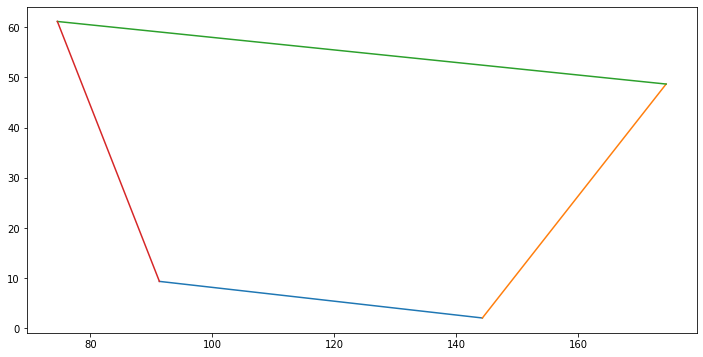

In [25]:
plt.figure(figsize=(12,6))
for index in range(4):
    plt.plot([boundary_points[index,0],boundary_points[index+1,0]],[boundary_points[index,1],boundary_points[index+1,1]])

In [26]:
def convert_to_sp(lon,lat):
    theta=np.deg2rad(90-lat)
    phi=np.deg2rad(lon)
    z=np.cos(theta)
    r=np.sin(theta)
    x=np.cos(phi)
    y=np.sin(phi)
    return x,y,z

In [28]:
# convert the array of lon,lat to x,y,z
boundary_points_new=[]
for i in range(5):
    boundary_points_new.append(convert_to_sp(boundary_points[i,0],boundary_points[i,1]))
boundary_points=np.array(boundary_points_new)

In [29]:
boundary_points

array([[-0.0232459 ,  0.99972978,  0.16287244],
       [-0.81192555,  0.583761  ,  0.03640535],
       [-0.99524346,  0.097419  ,  0.75096998],
       [ 0.26545374,  0.9641236 ,  0.87579917],
       [-0.0232459 ,  0.99972978,  0.16287244]])

In [32]:
sp=SphericalPolygon(boundary_points)

In [33]:
sp

[SingleSphericalPolygon(array([[-0.0232459 ,  0.99972978,  0.16287244],
       [ 0.26545374,  0.9641236 ,  0.87579917],
       [-0.99524346,  0.097419  ,  0.75096998],
       [-0.81192555,  0.583761  ,  0.03640535],
       [-0.0232459 ,  0.99972978,  0.16287244]]), array([-0.29099384,  0.82424176,  0.4857449 ]))]

## we loop through all points in each level, and determine if this point is inside the polygon, and then calculate the mean value.

In [8]:
rawminlon=74
rawmaxlon=175
rawminlat=0
rawmaxlat=62
rawmindep=0
rawmaxdep=800
# and we know the lon,lat spacing is 0.25 degree while dep spacing is 2.5km.

In [9]:
data.shape

(405, 249, 321)

Firstly we build up a matrix of the shape 405,209 and see if it's within the box.

In [36]:
within_matrix=np.zeros((405,249),dtype=np.bool)
for ilon in range(405):
    for ilat in range(249):
        lon=rawminlon+ilon*0.25
        lat=rawminlat+ilat*0.25
        x,y,z=convert_to_sp(lon,lat)
        if(sp.contains_point((x,y,z))):
            within_matrix[ilon,ilat]=True

In [50]:
tao_1d_avg=np.zeros(data.shape[-1])
for i in range(data.shape[-1]):
    data_alltao=data[:,:,i][within_matrix]
    data_use=data_alltao[data_alltao>0]
    tao_1d_avg[i]=np.mean(data_use)

In [51]:
tao_1d_avg

array([2.79068536, 3.41607977, 3.57990378, 3.76741428, 3.81801531,
       3.85598374, 3.88737418, 3.91201723, 3.94822339, 3.98466418,
       4.01227415, 4.03549557, 4.07073659, 4.12777245, 4.18253758,
       4.23020221, 4.27334185, 4.31763857, 4.35277488, 4.37412479,
       4.38862514, 4.3984885 , 4.40407918, 4.40667951, 4.40874768,
       4.41054391, 4.41185209, 4.41332787, 4.41578395, 4.41829872,
       4.41953477, 4.41863044, 4.41759673, 4.41651309, 4.41544576,
       4.41444716, 4.41355887, 4.41270497, 4.41203507, 4.41154353,
       4.41120497, 4.41099271, 4.41085523, 4.41099612, 4.41121035,
       4.41149797, 4.41187456, 4.41237574, 4.41306438, 4.41389836,
       4.41468172, 4.41557378, 4.41670077, 4.41815463, 4.42000487,
       4.42228556, 4.4249963 , 4.42810223, 4.43153545, 4.43524694,
       4.43919587, 4.44333162, 4.44760851, 4.45198597, 4.45642796,
       4.46090229, 4.46538053, 4.4698381 , 4.47425741, 4.47857056,
       4.48290325, 4.48722126, 4.49149335, 4.49569557, 4.49981

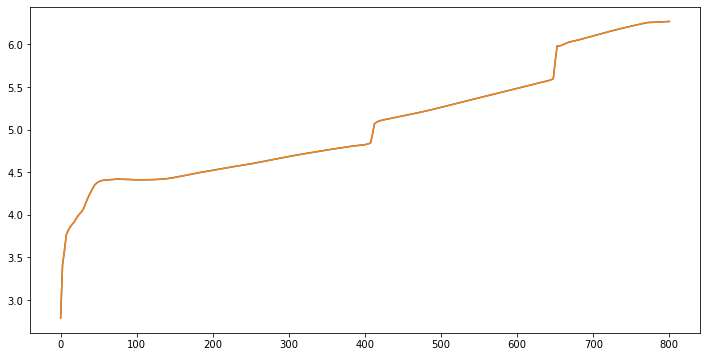

In [52]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg)
plt.plot(np.arange(0,801,2.5),tao_1d_avg)

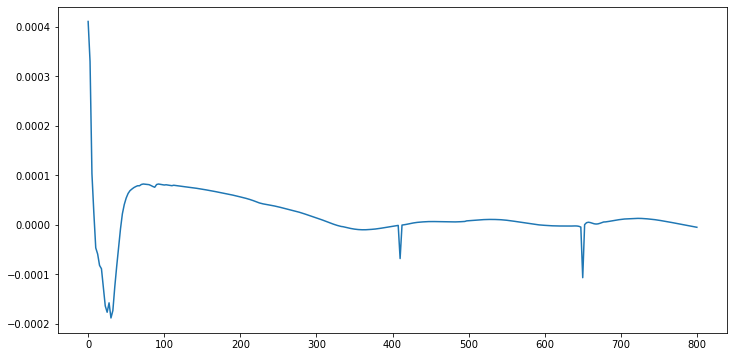

In [53]:
plt.figure(figsize=(12,6))
# plt.plot(np.arange(0,801,2.5),initial_1d_avg)
plt.plot(np.arange(0,801,2.5),tao_1d_avg-initial_1d_avg)

In [10]:
data_1d=np.load("/home/xiziyi/Japan_slab/Japan_Slab_code/data/ppm/1d_ppm_no_topo/vsv.npy")

In [11]:
initial_1d_taouse=np.zeros(data.shape[-1])
for i in range(data.shape[-1]):
    initial_1d_taouse[i]=np.mean(data_1d[:,:,i][data_1d[:,:,i]!=-1])

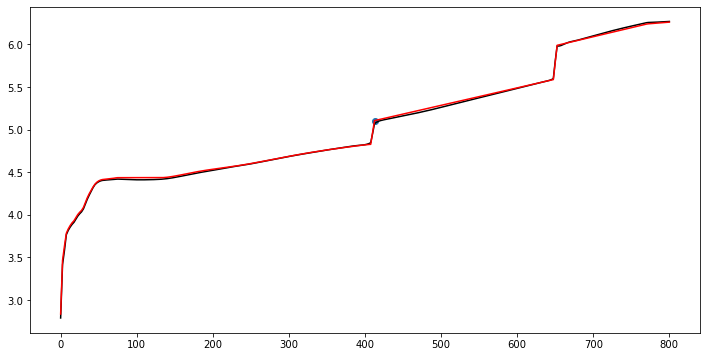

In [12]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
plt.scatter(412.5,initial_1d_taouse[int(412.5/2.5)])

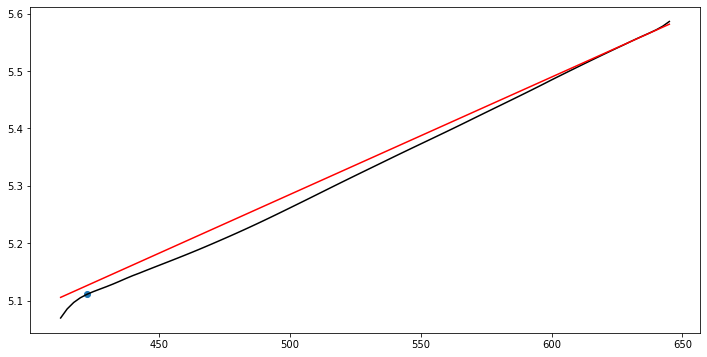

In [13]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(412.5,647.5,2.5),initial_1d_avg[165:259],color="k")
plt.plot(np.arange(412.5,647.5,2.5),initial_1d_taouse[165:259],color="r")
plt.scatter(422.5,initial_1d_avg[169])

(5.5, 6.2)

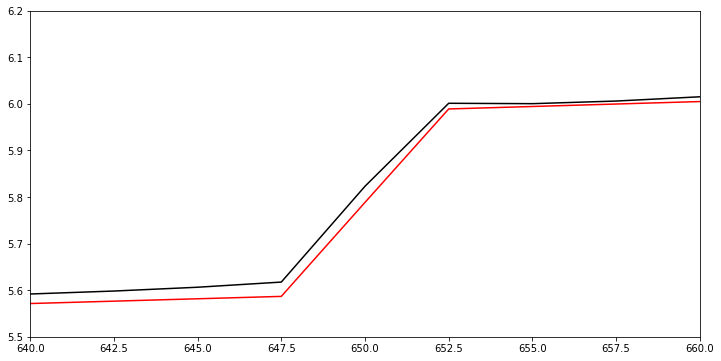

In [14]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg+0.02,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
# plt.scatter(412.5,initial_1d_taouse[int(412.5/2.5)])
plt.xlim((640,660))
plt.ylim((5.5,6.2))

In [15]:
(647.5-412.5)/2.5,647.5/2.5,412.5/2.5

(94.0, 259.0, 165.0)

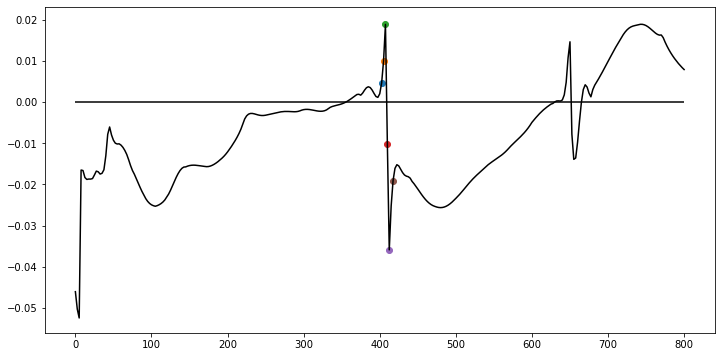

In [16]:
diff=initial_1d_avg-initial_1d_taouse
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg-initial_1d_taouse,color="k")
plt.scatter(402.5,diff[int(402.5/2.5)])
plt.scatter(405,diff[int(405/2.5)])
plt.scatter(407.5,diff[int(407.5/2.5)])
plt.scatter(410,diff[int(410/2.5)])
plt.scatter(412.5,diff[int(412.5/2.5)])
plt.scatter(417.5,diff[int(417.5/2.5)])
plt.hlines(xmin=0,xmax=800,y=0)

So now we could do the linear fitting from 412.5 to 657.5.

In [17]:
(647.5-412.5)/2.5+1

95.0

In [18]:
x_tofit=np.arange(95)*2.5+412.5

In [19]:
y_tofit=initial_1d_avg[165:260]

In [20]:
y_tofit.shape

(95,)

In [88]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_tofit,y_tofit)

In [89]:
slope, intercept, r_value, p_value, std_err

(0.0021631038544572333,
 4.185238226698001,
 0.9995374336704191,
 6.926968550924797e-143,
 6.824779296106265e-06)

In [90]:
# get new initial_1d_avg
initial_1d_avg_fit1d=initial_1d_avg.copy()
for index in range(165,260):
    depth=index*2.5
    initial_1d_avg_fit1d[index]=depth*slope+intercept

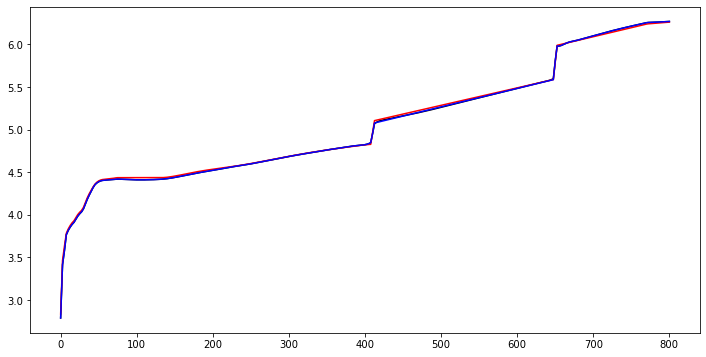

In [94]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
plt.plot(np.arange(0,801,2.5),initial_1d_avg_fit1d,color="b")

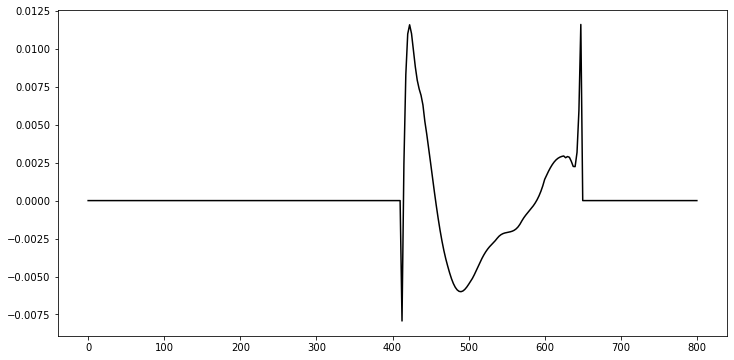

In [93]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg-initial_1d_avg_fit1d,color="k")

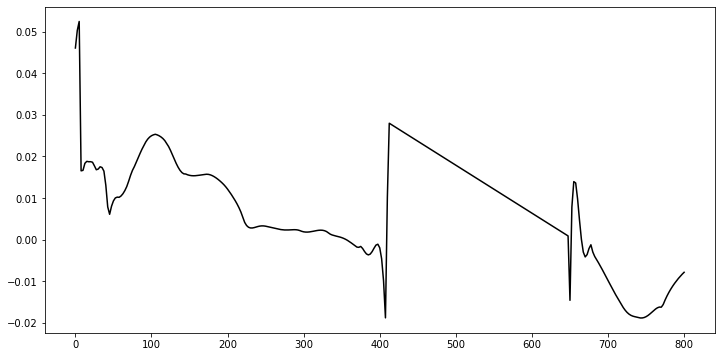

In [95]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_taouse-initial_1d_avg_fit1d,color="k")

In [96]:
x_tofit=[412.5,647.5]
y_tofit=[initial_1d_avg[int(412.5/2.5)],initial_1d_avg[int(647.5/2.5)]]

In [97]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_tofit,y_tofit)

In [98]:
slope, intercept, r_value, p_value, std_err

(0.002246215006452992, 4.143025470718397, 1.0, 0.0, 0.0)

In [99]:
# get new initial_1d_avg
initial_1d_avg_fit1d=initial_1d_avg.copy()
for index in range(165,260):
    depth=index*2.5
    initial_1d_avg_fit1d[index]=depth*slope+intercept

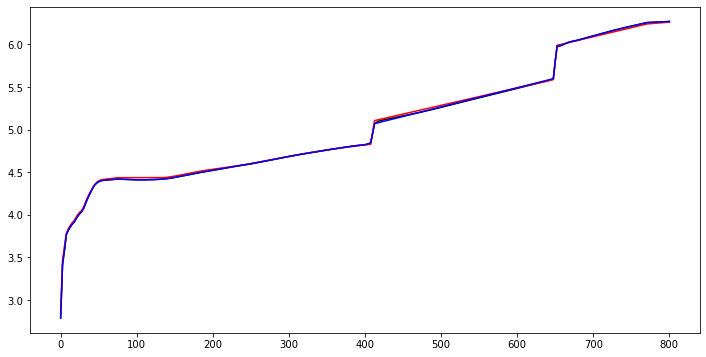

In [100]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
plt.plot(np.arange(0,801,2.5),initial_1d_avg_fit1d,color="b")

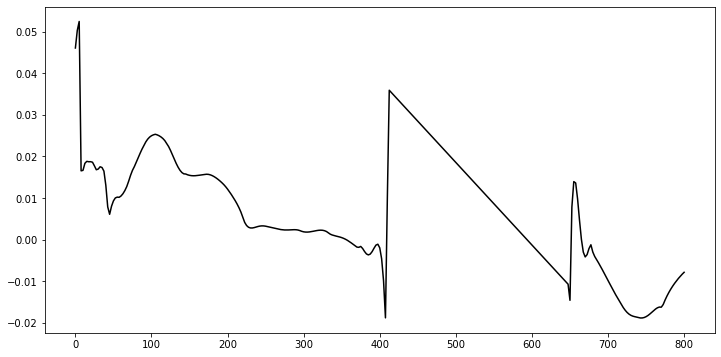

In [101]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_taouse-d,color="k")

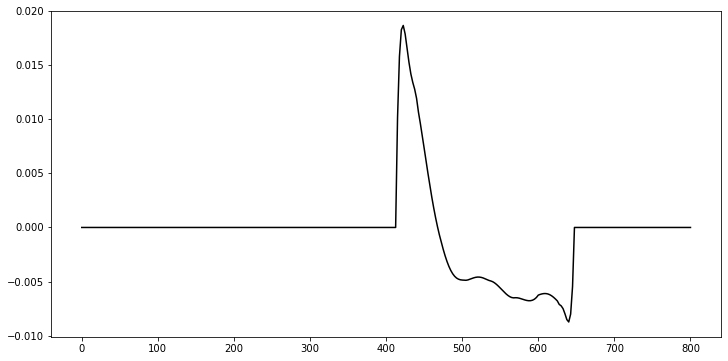

In [102]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg-initial_1d_avg_fit1d,color="k")

## Test if there is any -1 in data

In [124]:
depth=102
for i in range(data.shape[0]):
    toplot=False
    toplot_again=False
#     print("="*20)
    for j in range(data.shape[1]):
        if((data[i,j,depth]<0.0) and (not toplot_again) and (not toplot)):
            continue
        if((data[i,j,depth]>0.0) and (not toplot_again) and (not toplot)):
            toplot=True
            continue
        if((data[i,j,depth]>0.0) and (not toplot_again) and (toplot)):
            continue
        if((data[i,j,depth]<0.0) and (not toplot_again) and (toplot)):
            toplot_again=True
            continue
        if((data[i,j,depth]>0.0) and (toplot_again) and (toplot)):
            print(i,j,data[i,j,depth])

Use inner points for interpolation

In [165]:
(640-420)/2.5+1

89.0

In [166]:
640/2.5,420/2.5

(256.0, 168.0)

In [246]:
x_tofit=np.arange(89)*2.5+420
y_tofit=initial_1d_avg[168:257]
y_tofit.shape

(89,)

In [247]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_tofit,y_tofit)

In [248]:
slope, intercept, r_value, p_value, std_err

(0.00215732357739816,
 4.188037685923019,
 0.9995326396896085,
 1.4170171948991013e-133,
 7.073735976663795e-06)

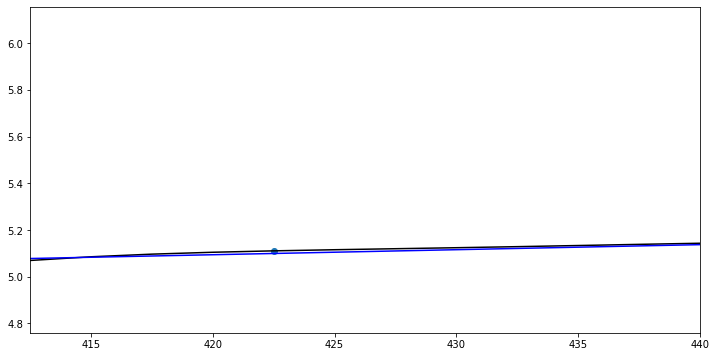

In [183]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(400,700,2.5),initial_1d_avg[160:280],color="k")
# plt.plot(np.arange(400,700,2.5),initial_1d_taouse[160:280],color="r")
plt.plot(np.arange(412.5,700,2.5),np.arange(412.5,700,2.5)*slope+intercept,color="b")
plt.scatter(422.5,initial_1d_avg[169])
plt.xlim((412.5,440))
plt.show()

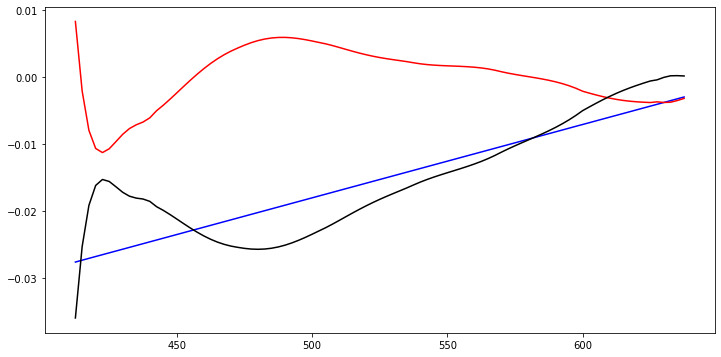

In [186]:
plt.figure(figsize=(12,6))
# plt.plot(np.arange(400,700,2.5),initial_1d_avg[160:280],color="k")
# plt.plot(np.arange(400,700,2.5),initial_1d_taouse[160:280],color="r")
plt.plot(np.arange(412.5,640,2.5),np.arange(412.5,640,2.5)*slope+intercept-initial_1d_taouse[165:256],color="b")
plt.plot(np.arange(412.5,640,2.5),np.arange(412.5,640,2.5)*slope+intercept-initial_1d_avg[165:256],color="r")
plt.plot(np.arange(412.5,640,2.5),initial_1d_avg[165:256]-initial_1d_taouse[165:256],color="k")
# plt.scatter(422.5,initial_1d_avg[169])
# plt.xlim((412.5,440))
plt.show()

array([2.83633345, 3.46604001, 3.63224219, 3.7839222 , 3.83471176,
       3.87438218, 3.90627097, 3.93082434, 3.96707817, 4.00342991,
       4.03018632, 4.05244483, 4.087885  , 4.14545454, 4.19999131,
       4.24674739, 4.28644869, 4.32550581, 4.35883361, 4.38211133,
       4.39787236, 4.40844408, 4.4142206 , 4.41677523, 4.41916155,
       4.42149651, 4.4235555 , 4.4259924 , 4.42973651, 4.43366433,
       4.43609642, 4.43609641, 4.43609632, 4.43609625, 4.43609626,
       4.43609627, 4.43609621, 4.43609617, 4.43609615, 4.43609624,
       4.43609644, 4.43609667, 4.43609666, 4.43609619, 4.43609644,
       4.43609666, 4.43609653, 4.43609618, 4.4360962 , 4.43619509,
       4.43604712, 4.43589625, 4.4359516 , 4.43638686, 4.43733044,
       4.43886685, 4.44103736, 4.44383997, 4.44722947, 4.4507527 ,
       4.45457304, 4.45863445, 4.46288517, 4.46727623, 4.47176176,
       4.47629929, 4.48084974, 4.4853774 , 4.48984995, 4.4942184 ,
       4.49851557, 4.50271527, 4.50679784, 4.51075111, 4.51456

## Here we replace only the value between 410 and 650 as the average model.

In [191]:
410/2.5,650/2.5

(164.0, 260.0)

In [192]:
165,260

(165, 260)

In [199]:
d1=np.load("/Users/ziyixi/work/Japan_Slab_code/data/ppm/flat_3d/1d_ppm/vsv.npy")

In [200]:
d1.shape

(405, 249, 321)

In [201]:
d1[:,:,:165]=initial_1d_avg[:165]

In [202]:
np.save("/Users/ziyixi/work/Japan_Slab_code/data/ppm/flat_3d/1d_ppm/vsv.modified_to_165.npy",d1)

## Between 410 and 650, we increase the avg with the value of 0.02.

In [21]:
initial_1d_avg.shape

(321,)

In [22]:
410/2.5,650/2.5

(164.0, 260.0)

In [23]:
# initial_1d_avg_add_02=initial_1d_avg.copy()
# initial_1d_avg_add_02[165:260]=initial_1d_avg_add_02[165:260]+0.02
# per=np.zeros(data.shape)
# for index in range(321):
#     per[:,:,index]=data[:,:,index]/initial_1d_avg_add_02[index]-1

In [24]:
# np.save("/Users/ziyixi/work/Japan_Slab_code/data/ppm/flat_3d/per_3d_1d/vsv.add02.npy",per)

In [25]:
slope, intercept, r_value, p_value, std_err

NameError: name 'slope' is not defined

replace np.arange(412.5,640,2.5) with the fitted one.

In [152]:
initial_1d_avg_fitted=initial_1d_avg.copy()
# initial_1d_avg_fitted[168:256]=np.arange(420,640,2.5)*slope+intercept+0.027
initial_1d_avg_fitted[165:167]=initial_1d_avg_fitted[165:167]+0.0105
initial_1d_avg_fitted[167]=initial_1d_avg_fitted[167]+0.0115
initial_1d_avg_fitted[168]=initial_1d_avg_fitted[168]+0.0125
initial_1d_avg_fitted[159:162]=initial_1d_avg_fitted[159:162]-0.003
# we change to tao's 1d
initial_1d_avg_fitted[169:256]=initial_1d_taouse[169:256]
initial_1d_avg_fitted[:159]=initial_1d_taouse[:159]

(4.7, 5.3)

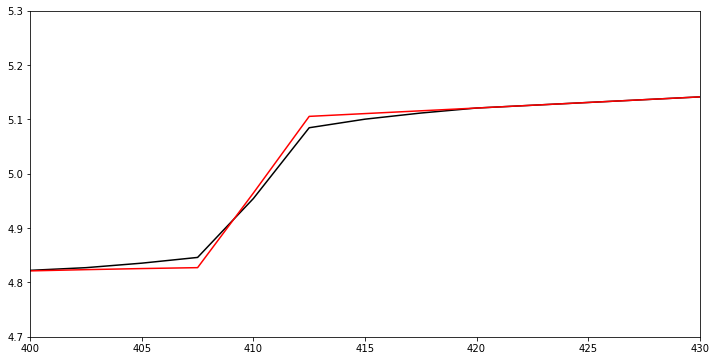

In [160]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,801,2.5),initial_1d_avg_fitted,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_taouse,color="r")
# plt.scatter(412.5,initial_1d_taouse[int(412.5/2.5)])
plt.xlim((400,430))
plt.ylim((4.7,5.3))

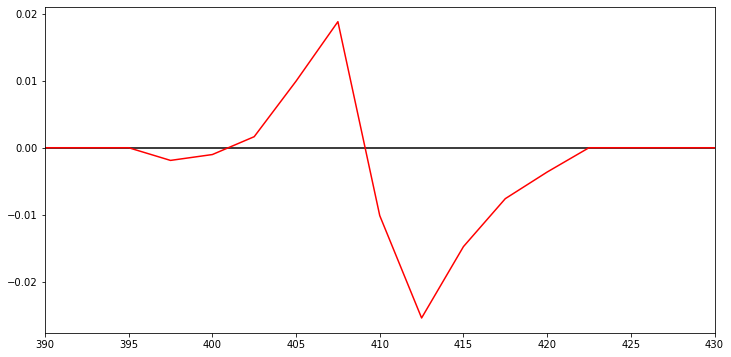

In [154]:
plt.figure(figsize=(12,6))
# plt.plot(np.arange(0,801,2.5),initial_1d_avg_fitted,color="k")
plt.plot(np.arange(0,801,2.5),initial_1d_avg_fitted-initial_1d_taouse,color="r")
# plt.scatter(412.5,initial_1d_taouse[int(412.5/2.5)])
plt.xlim((390,430))
ax=plt.gca()
ax.hlines(y=0, xmin=0, xmax=450,color='k')
# plt.ylim((4.7,5.3))

In [155]:
per=np.zeros(data.shape)
for index in range(321):
    per[:,:,index]=data[:,:,index]/initial_1d_avg_fitted[index]-1

In [156]:
np.save("/home/xiziyi/Japan_slab/Japan_Slab_code/data/ppm/3d_1d_per_ppm_no_topo/vsv.npy",per)

In [146]:
420/2.5

168.0

In [396]:
397.5/2.5

159.0

In [406]:
410/2.5

164.0

In [417]:
405/2.5

162.0

Here we consider the problem around 650.

## Here we consider directly use 3d ppm

In [159]:
initial_1d_avg_fitted=initial_1d_avg.copy()
# initial_1d_avg_fitted[168:256]=np.arange(420,640,2.5)*slope+intercept+0.027
initial_1d_avg_fitted[165:168]=initial_1d_avg_fitted[165:168]+0.015
initial_1d_avg_fitted[159:162]=initial_1d_avg_fitted[159:162]-0.001
# we change to tao's 1d
initial_1d_avg_fitted[168:256]=initial_1d_taouse[168:256]
initial_1d_avg_fitted[:159]=initial_1d_taouse[:159]

In [33]:
data_1d.shape

(405, 249, 321)

In [34]:
data_1d_modified=data_1d.copy()
data_1d_modified[:,:,165:168]=initial_1d_avg[165:168]+0.015
data_1d_modified[:,:,159:162]=initial_1d_avg[159:162]-0.001
data_1d_modified[:,:,168:256]=initial_1d_avg[168:256]
data_1d_modified[:,:,:159]=initial_1d_avg[:159]

In [37]:
per=data/data_1d_modified-1

In [38]:
np.save("/home/xiziyi/Japan_slab/Japan_Slab_code/data/ppm/3d_1d_per_ppm_no_topo/vsv.npy",per)